In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [2]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [7]:
df = pd.read_csv('data/men_shoes.csv', low_memory=False)
df.shape

(18280, 48)

In [8]:
mean_price = np.mean(df['prices_amountmin'])
mean_price

93.53952188183217

In [9]:
y_true = df.prices_amountmin
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true,y_pred)

63.968341227870624

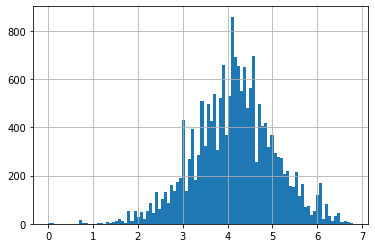

In [12]:
np.log1p(df.prices_amountmin).hist(bins=100)

In [14]:
y_true = df.prices_amountmin
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true,y_pred)

58.01120240700219

In [16]:
y_true = df.prices_amountmin
price_log_mean = np.expm1(np.mean(np.log1p(y_true)))
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true,y_pred)

58.03539547661041

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [0]:
feats = ['brand_cat']

def runs_model(feats):
  X = df[feats].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = -1 * cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [29]:
runs_model(feats)

(58.38655694633361, 4.223555478221712)

In [31]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight', 'brand_cat'],
      dtype='object')

In [39]:
df.categories.value_counts()

All Men's Shoes,Shoes,Men's Shoes,Clothing                                                                                   3698
Clothing,Shoes,Men's Shoes,All Men's Shoes                                                                                   1632
Men's Casual Shoes,Shoes,Men's Shoes,Clothing                                                                                 698
All Men's Clothing,Men's Clothing,Men's Outerwear,Clothing, Shoes & Jewelry,Clothing                                          586
Clothing, Shoes & Accessories,Men's Shoes,Athletic                                                                            391
                                                                                                                             ... 
Accessories,Sunglasses,Men,Contemporary & Designer,Clothing, Shoes & Jewelry,Sunglasses & Eyewear Accessories                   1
Clothing, Shoes & Accessories,Men's Clothing,Coats & Jackets,See more Wings & Horns 9687 M

In [0]:
df['categories_cat'] = df['categories'].factorize()[0]

In [42]:
runs_model(['categories_cat'])

(59.82560591635895, 3.4214679298235415)

In [44]:
runs_model(['categories_cat','brand_cat'])

(58.48960457872583, 6.135642974334123)

In [45]:
df.manufacturer.value_counts()

Puma                           476
Nike                           374
New Balance                    249
VANS                           170
Reebok                         128
                              ... 
Marvel                           1
Rainbow                          1
Osiris Shoes                     1
Columbia Sportswear Company      1
5150                             1
Name: manufacturer, Length: 618, dtype: int64

In [0]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]

In [48]:
runs_model(['manufacturer_cat'])

(63.133649278023746, 3.394307434888982)

In [59]:
runs_model(['manufacturer_cat','categories_cat','brand_cat'])

(58.326630078030554, 6.222206087396125)

In [0]:
df['prices_merchant_cat'] = df['prices_merchant'].factorize()[0]

In [64]:
runs_model(['manufacturer_cat','categories_cat','brand_cat','prices_merchant_cat'])

(57.419487800519065, 3.3851127176192257)

In [66]:
runs_model(['categories_cat','brand_cat','prices_merchant_cat'])

(57.32819573350709, 3.237111863559281)